The dataset you will analyze in this HW is the RMS Titanic. https://en.wikipedia.org/wiki/RMS_Titanic.

Your goal is to classify survivability based on the various factors of the passengers. 

For our problem, we will choose the factors listed below:

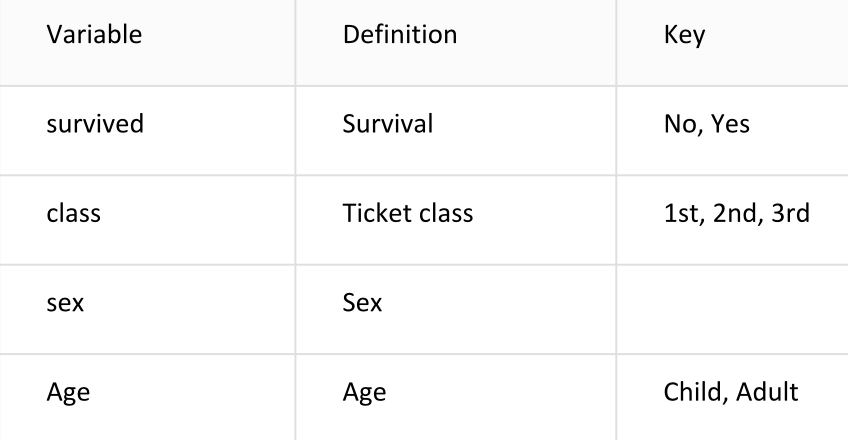

The dataset we will be using can be found in the shared dataset folder. The file name is Titanic.csv

1. Read the dataset into a dataframe. Display the first 5 rows of the dataframe. (2)
2. Explore the dataset and determine what is the target variable. (2)
3. Drop factor(s) that are not likely to be relevant for logistic regression. (2)
4. Make sure there are no missing values. Handle missing values if any. (2)
5. Plot count plots of each of the remaining factors (including the target variable). (3)
6. Convert all categorical feature variables into dummy variables. (3)
7. Partition the data into train and test sets (70/30). Use random_state = 2020. (2)
8. Fit the training data to a logistic regression model. (2)
9. Predict the outcomes for the test set. (2)
10. Display the accuracy of your predictions for survivability. (2)
11. Display the confusion matrix along with the labels (Yes, No).
Hint: You may want to use from sklearn.metrics import plot_confusion_matrix (2)
12. Now, display the predicted value of the survivability of a male adult passenger traveling in 3 rd class. (3)
13. Next, display the predicted probability of the survivability of a male adult passenger traveling in 3 rd class. (3)

In [20]:
# Import necessary packages
import io
from google.colab import files

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Upload the corresponding file
uploaded = files.upload()

Saving Titanic.csv to Titanic.csv


**1. Read the dataset into a dataframe and display the first 5 rows of the dataframe. (2)**

In [21]:
df = pd.read_csv(io.BytesIO(uploaded["Titanic.csv"]))
df.head(5)

,Passenger,Class,Sex,Age,Survived
0,1,3rd,Male,Child,No
1,2,3rd,Male,Child,No
2,3,3rd,Male,Child,No
3,4,3rd,Male,Child,No
4,5,3rd,Male,Child,No


**2. Explore the dataset and determine what is the target variable. (2)**

In [22]:
# Explore the dataset
print(df.info)
print()
print('-----------------------------------------------------------------------')
print()
print(df.describe())

<bound method DataFrame.info of       Passenger Class     Sex    Age Survived
0             1   3rd    Male  Child       No
1             2   3rd    Male  Child       No
2             3   3rd    Male  Child       No
3             4   3rd    Male  Child       No
4             5   3rd    Male  Child       No
...         ...   ...     ...    ...      ...
2196       2197  Crew  Female  Adult      Yes
2197       2198  Crew  Female  Adult      Yes
2198       2199  Crew  Female  Adult      Yes
2199       2200  Crew  Female  Adult      Yes
2200       2201  Crew  Female  Adult      Yes

[2201 rows x 5 columns]>

-----------------------------------------------------------------------

         Passenger
count  2201.000000
mean   1101.000000
std     635.518292
min       1.000000
25%     551.000000
50%    1101.000000
75%    1651.000000
max    2201.000000


As we can see, what class each passenger came from (indicated by the variable 'Class'), what sex each passenger was (indicated by the variable 'Sex'), and the age of each passenger (indicated by the variable 'Age') might all influence whether a passenger survived or not (indicated by the variable 'Survived'). Thus, for our model the independent variables are 'Class', 'Sex', and 'Age', while the dependent variable is 'Survived' (and this is our target variable)

**3. Drop factor(s) that are not likely to be relevant for logistic regression. (2)**

In [23]:
# Drop unrelevant column(s) - here 'Passenger' is a irrevelant term
df.drop(columns=['Passenger'], inplace=True)
df.head(5)

,Class,Sex,Age,Survived
0,3rd,Male,Child,No
1,3rd,Male,Child,No
2,3rd,Male,Child,No
3,3rd,Male,Child,No
4,3rd,Male,Child,No


**4. Make sure there are no missing values. Handle missing values if any. (2)**

In [24]:
# Check if null values exist and drop them
df.info()
df.dropna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Class     2201 non-null   object
 1   Sex       2201 non-null   object
 2   Age       2201 non-null   object
 3   Survived  2201 non-null   object
dtypes: object(4)
memory usage: 68.9+ KB


<bound method DataFrame.dropna of      Class     Sex    Age Survived
0      3rd    Male  Child       No
1      3rd    Male  Child       No
2      3rd    Male  Child       No
3      3rd    Male  Child       No
4      3rd    Male  Child       No
...    ...     ...    ...      ...
2196  Crew  Female  Adult      Yes
2197  Crew  Female  Adult      Yes
2198  Crew  Female  Adult      Yes
2199  Crew  Female  Adult      Yes
2200  Crew  Female  Adult      Yes

[2201 rows x 4 columns]>

**5. Plot count plots of each of the remaining factors (including the target variable). (3)**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


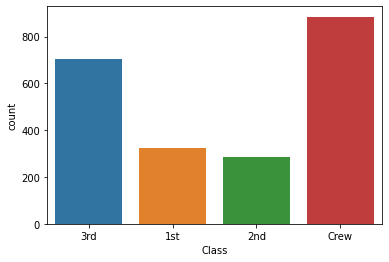

In [25]:
# Count plot for 'Class'
CountPlot_Class = sns.countplot(df['Class'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


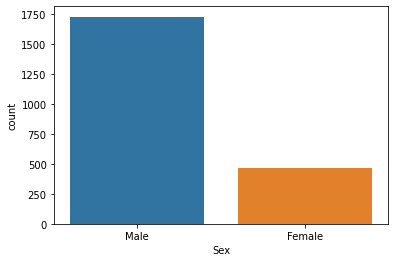

In [8]:
# Count plot for 'Sex'
CountPlot_Sex = sns.countplot(df['Sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


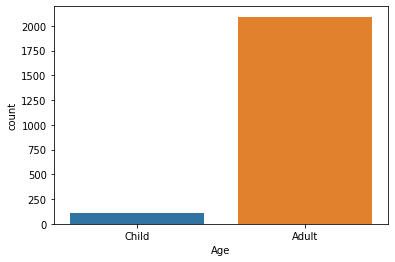

In [9]:
# Count plot for 'Age'
CountPlot_Age = sns.countplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


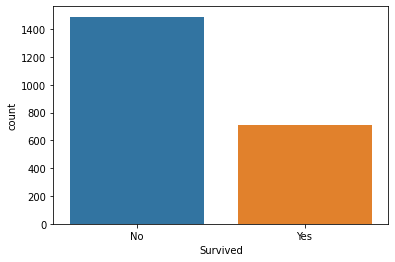

In [10]:
# Count plot for 'Survived'
CountPlot_Survived = sns.countplot(df['Survived'])

**6. Convert all categorical feature variables into dummy variables. (3)**

In [26]:
df = pd.get_dummies(df, columns=['Survived', 'Class', 'Age', 'Sex'])
df.head(5)

,Survived_No,Survived_Yes,Class_1st,Class_2nd,Class_3rd,Class_Crew,Age_Adult,Age_Child,Sex_Female,Sex_Male
0,1,0,0,0,1,0,0,1,0,1
1,1,0,0,0,1,0,0,1,0,1
2,1,0,0,0,1,0,0,1,0,1
3,1,0,0,0,1,0,0,1,0,1
4,1,0,0,0,1,0,0,1,0,1


**7. Partition the data into train and test sets (70/30). Use random_state = 2020. (2)**

In [27]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, df.columns.get_loc('Class_1st'):]
y = df['Survived_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

**8. Fit the training data to a logistic regression model. (2)**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

# Set up the default model
myLogReg = LogisticRegression()

# Fit the model with train data
myLogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**9. Predict the outcomes for the test set. (2)**

In [29]:
# Predict the test set
y_predicted = myLogReg.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**10. Display the accuracy of your predictions for survivability. (2)**

In [30]:
from sklearn.metrics import accuracy_score
print('The accuracy of predictions is', accuracy_score(y_test, y_predicted))

The accuracy of predictions is 0.7987897125567323


**11. Display the confusion matrix along with the labels (Yes, No). Hint: You may want to use from sklearn.metrics import plot_confusion_matrix (2)**

[[413  34]
 [ 99 115]]


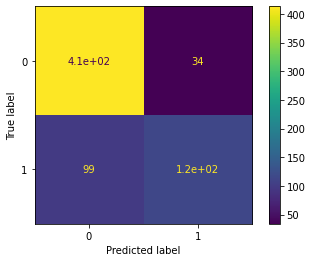

In [31]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_predicted)
print(cnf_matrix)

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X, y)
dummy_clf.score(X, y)

metrics.plot_confusion_matrix(myLogReg, X_test, y_test)

**12. Now, display the predicted value of the survivability of a male adult passenger traveling in 3 rd class. (3)**

In [32]:
maleAdultInClass3 = np.array(X_test[(X_test['Class_3rd'] == 1) &
  (X_test['Age_Adult'] == 1) & (X_test['Sex_Male'] == 1)].iloc[0, :])
maleAdultInClass3 = maleAdultInClass3.reshape(-1, 8)

print(myLogReg.predict(maleAdultInClass3)[0])

0


**13. Next, display the predicted probability of the survivability of a male adult passenger traveling in 3 rd class. (3)**

In [33]:
print(myLogReg.predict_proba(maleAdultInClass3)[0][1])

0.12240694822168924
